In [6]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import numpy as np

In [7]:
img = cv2.imread('864.png')
img2=cv2.imread('848.png')

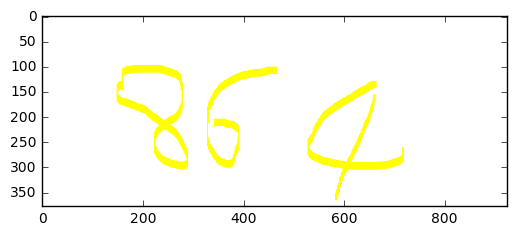

In [8]:
plt.imshow(img)

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
ret,bimg = cv2.threshold(gray,200,255,cv2.THRESH_BINARY_INV)

In [11]:
bimg_o,contours,hierachy = cv2.findContours(bimg,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [12]:
help(cv2.findContours)

Help on built-in function findContours:

findContours(...)
    findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> image, contours, hierarchy
    .   @brief Finds contours in a binary image.
    .   
    .   The function retrieves contours from the binary image using the algorithm @cite Suzuki85 . The contours
    .   are a useful tool for shape analysis and object detection and recognition. See squares.cpp in the
    .   OpenCV sample directory.
    .   @note Since opencv 3.2 source image is not modified by this function.
    .   
    .   @param image Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero
    .   pixels remain 0's, so the image is treated as binary . You can use cv::compare, cv::inRange, cv::threshold ,
    .   cv::adaptiveThreshold, cv::Canny, and others to create a binary image out of a grayscale or color one.
    .   If mode equals to cv::RETR_CCOMP or cv::RETR_FLOODFILL, the input can also be a 32-bit integer image of l

In [13]:
img1 = img2.copy()

r=0
for cot in contours:
    color = (r*30,r*30,r*30)
    cv2.drawContours(img1,contours,r,color,r+1)
    r += 1

In [14]:
def show(img):
    cv2.imshow("bimg",img)
    if cv2.waitKey(0) == -1:
        cv2.destroyAllWindows()   


In [58]:
img = cv2.imread('2grid.png',0)
dft = np.fft.fft2(img)
ft = np.fft.fftshift(dft)
ls_ft = 20*np.log(np.abs(ft))

([], <a list of 0 Text xticklabel objects>)

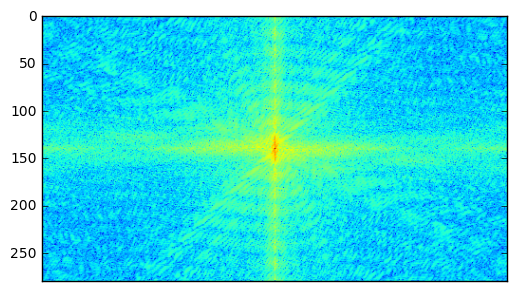

In [59]:
plt.imshow(ls_ft)
plt.xticks([])

In [41]:
# revert
idft = np.fft.ifftshift(ft)
i_img = np.fft.ifft2(idft)
i_img = np.abs(i_img)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

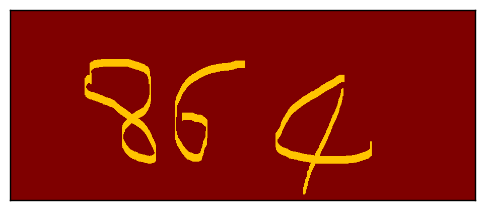

In [48]:
plt.imshow(img)
plt.xticks([]),plt.yticks([])

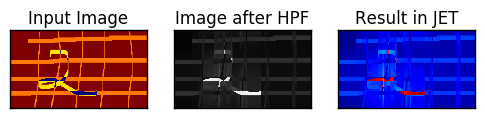

In [61]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('2grid.png',0)
f = np.fft.fft2(img)#得到结果为复数矩阵
fshift = np.fft.fftshift(f)#直接取中心

rows, cols = img.shape
crow,ccol = rows/2 , cols/2


fshift[int(crow-1):int(crow+1), :] = 0#蒙板大小60×60
f_ishift = np.fft.ifftshift(fshift)#回到左上角
img_back = np.fft.ifft2(f_ishift)#使用FFT逆变换，此时结果仍然是复数
img_back = np.abs(img_back)#还原成JET图像，变成可以看的图像
plt.subplot(131),plt.imshow(img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()